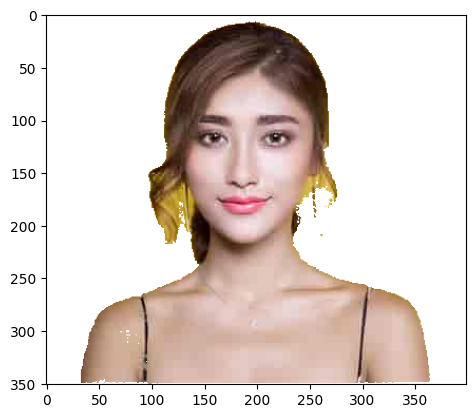

In [28]:
import os 
import base64
import cv2 
import numpy as np 
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt

model_path = 'sam_vit_b_01ec64.pth'

sam = sam_model_registry['vit_b'](checkpoint=model_path)

sam_predictor = SamPredictor(sam)

def background_removal(image_encoded, x, y): 
    image_byte = base64.b64decode(image_encoded)
    image = cv2.imdecode(np.frombuffer(image_byte, np.uint8), cv2.IMREAD_COLOR)

    sam_predictor.set_image(image)

    masks, _, _ = sam_predictor.predict(point_coords=np.asarray([[x, y]]), point_labels=np.asarray([1]), multimask_output=True)

    C, H, W = masks.shape 
    results_masks = np.zeros((H, W), dtype=bool)

    for j in range(C): 
        results_masks |= masks[j,:,:]
    
    results_masks = results_masks.astype(np.uint8)

    alpha_channel = np.ones((H, W), dtype=results_masks.dtype)*255

    alpha_channel[results_masks==0] = 0

    inverse_alpha = alpha_channel[results_masks==0] = 0

    results_image = cv2.merge((image, alpha_channel))

    _, image_png = cv2.imencode('.png', results_image)

    image_png = image_png.tobytes()

    image_encoded = base64.b64encode(image_png).decode('utf-8')


    return image_encoded, inverse_alpha


img_path = '/Users/hanna m/machinelearning/deep_learning/cv/background_removal/face_2.jpg'
image = cv2.imread(img_path)

x = 141
y = 296

_, image_png = cv2.imencode('.png', image)

image_byte = image_png.tobytes()

image_encoded = base64.b64encode(image_byte).decode('utf-8')

img, inv_a = background_removal(image_encoded, x, y)

image_decoded = base64.b64decode(img)

img = cv2.imdecode(np.frombuffer(image_decoded, np.uint8), cv2.IMREAD_UNCHANGED)

i = cv2.bitwise_or(img, inv_a)

plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGRA2RGBA))
plt.show()

In [11]:
import modelbit
mb = modelbit.login()

In [12]:
mb.deploy(background_removal)

Encrypting 'sam_predictor': 395MB [00:01, 203MB/s]                            
Uploading 'sam_predictor':  75%|███████▌  | 264M/352M [1:01:16<20:23, 71.8kB/s]  
Encrypting 'sam_predictor': 395MB [00:06, 60.4MB/s]                            
Uploading 'sam_predictor': 100%|██████████| 352M/352M [22:05<00:00, 265kB/s]    
